# Health insurance Analysis


#### Objective: predict insurance charges based on demographic and medical information, with a focus on the Body Mass Index (BMI) as a key variable

In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [71]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [72]:
# checking basic information of the dataset, like datatype. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [73]:
#Summary statistics
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [74]:
# checked if there is any null value. 
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


# Exploratory Data Analysis



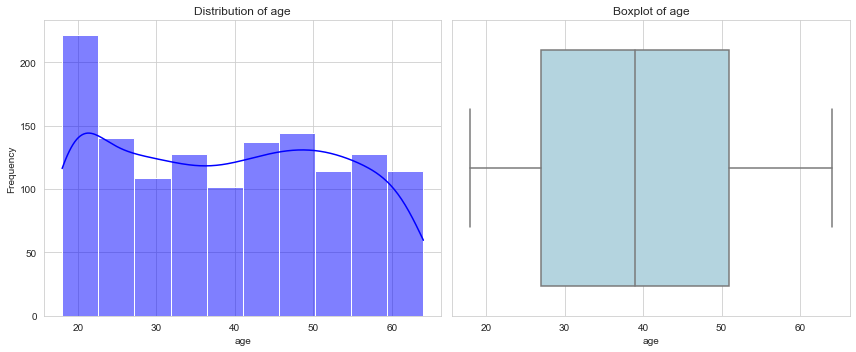

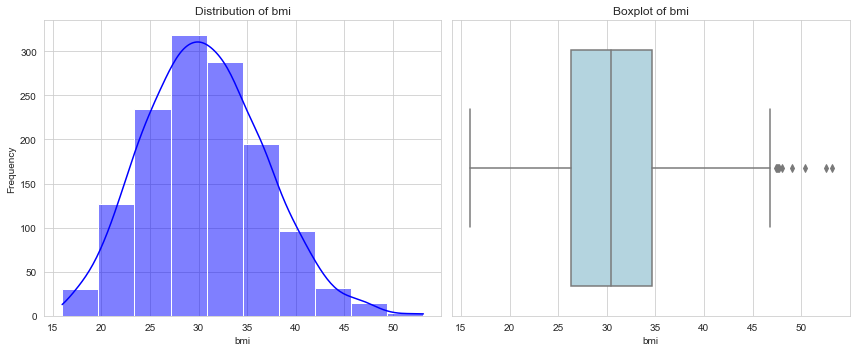

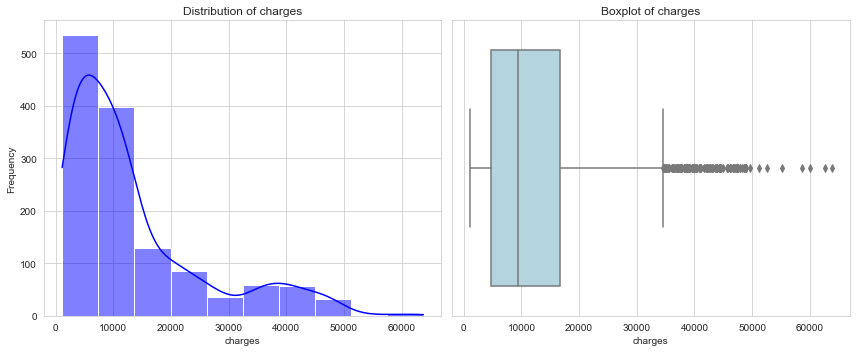

In [75]:
#### Focus of each variable

sns.set_style("whitegrid")
numerical_vars = ["age", "bmi", "charges"]

for var in numerical_vars:
    plt.figure(figsize = (12,5))
    
    # Histogram
    plt.subplot(1,2,1)
    sns.histplot(df[var], kde =True, bins =10, color = "blue" )
    plt.title(f"Distribution of {var}" )
    plt.xlabel(var)
    plt.ylabel("Frequency")
    
     # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[var], color='lightblue')
    plt.title(f"Boxplot of {var}")
    plt.xlabel(var)

    plt.tight_layout()
    plt.show()
    
    

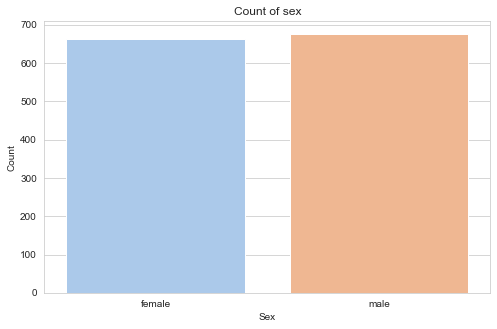

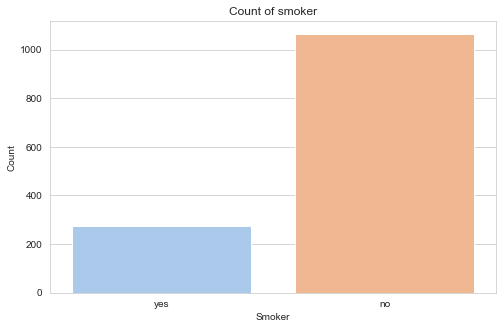

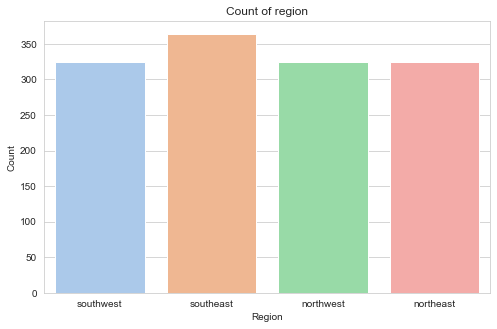

In [76]:
# Categorical Variables
categorical_vars = ['sex', 'smoker', 'region']

for var in categorical_vars:
    plt.figure(figsize=(8, 5))

    # Bar plot
    sns.countplot(x=df[var], palette='pastel')
    plt.title(f"Count of {var}")
    plt.xlabel(var.capitalize())
    plt.ylabel('Count')

    plt.show()


Correlation Matrix:
              age       bmi   charges
age      1.000000  0.109272  0.299008
bmi      0.109272  1.000000  0.198341
charges  0.299008  0.198341  1.000000


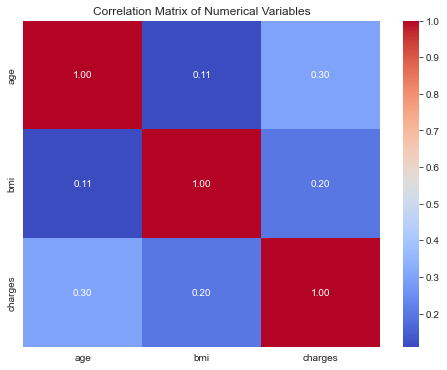

In [77]:
# Correlation between numerical variables

# Correlation matrix for numerical variables
correlation_matrix = df[['age', 'bmi', 'charges']].corr()

# Display correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()




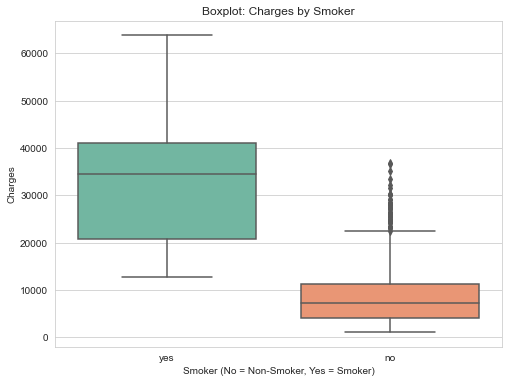

In [78]:
# Boxplot for charges by smoker (using 'yes' and 'no' directly)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='smoker', y='charges', palette='Set2')

plt.title('Boxplot: Charges by Smoker')
plt.xlabel('Smoker (No = Non-Smoker, Yes = Smoker)')
plt.ylabel('Charges')
plt.show()


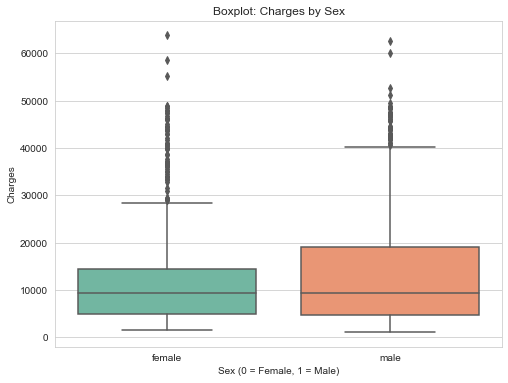

In [79]:
# Boxplot for charges by sex (0 = Female, 1 = Male)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='sex', y='charges', palette='Set2')
plt.title('Boxplot: Charges by Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Charges')
plt.show()


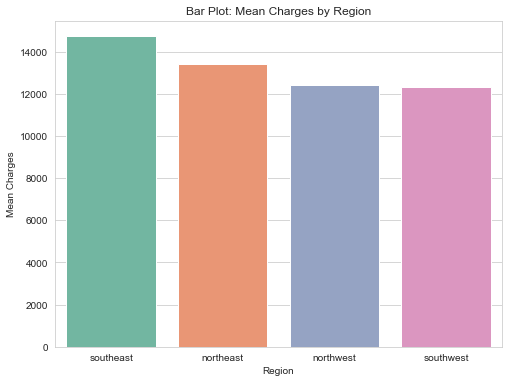

In [80]:
# Bar plot for mean charges by region
mean_charges_by_region = df.groupby('region')['charges'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='region', y='charges', palette='Set2', ci=None, order=mean_charges_by_region.index)

plt.title('Bar Plot: Mean Charges by Region')
plt.xlabel('Region')
plt.ylabel('Mean Charges')
plt.show()



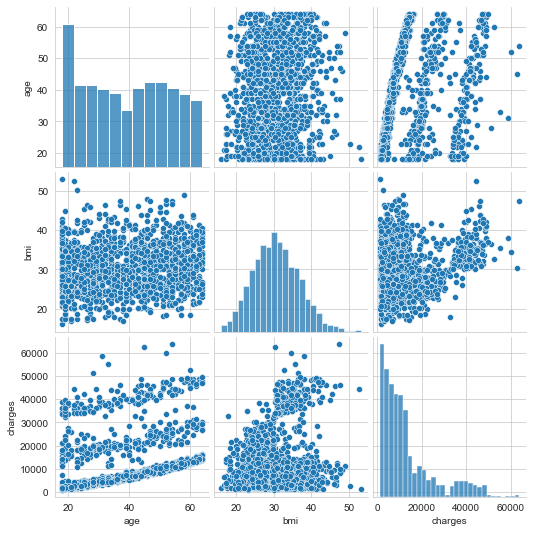

In [81]:
sns.pairplot(df[['age', 'bmi', 'charges']])
plt.show()

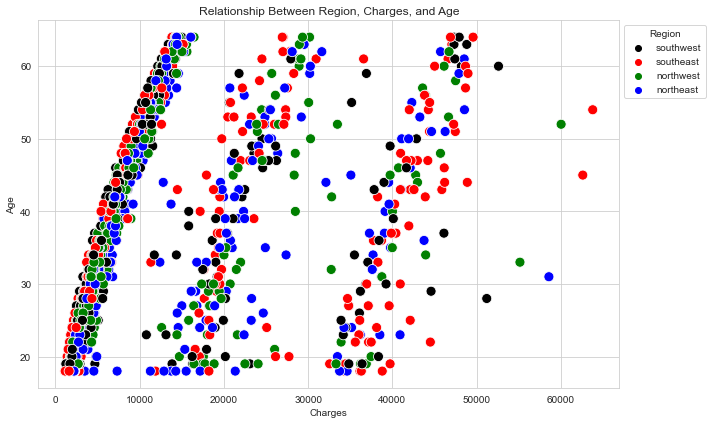

In [89]:
#Relationship between region, charges and age. 

# color mapping for regions
color_mapping = {
    'northwest': 'green',
    'northeast': 'blue',
    'southeast': 'red',
    'southwest': 'black'
}

# Apply the custom color mapping to the 'region' column
df['color'] = df['region'].map(color_mapping)

# Create a scatter plot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='charges', y='age', hue='region', palette= color_mapping, s=100)

# Set plot labels
plt.title('Relationship Between Region, Charges, and Age')
plt.xlabel('Charges')
plt.ylabel('Age')


# Move the legend outside the plot using bbox_to_anchor
plt.legend(title='Region', loc='upper left', bbox_to_anchor=(1, 1))

# Show plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()




In [90]:
# One-Hot Encoding for 'region' (keep all regions)
df = pd.get_dummies(df, columns=['region'], drop_first=False)

# Binary Encoding for 'sex' and 'smoker'
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

# Display the modified DataFrame
print(df.head())



   age  sex     bmi  children  smoker      charges  region_numeric  color  \
0   19    1  27.900         0       1  16884.92400               3  black   
1   18    0  33.770         1       0   1725.55230               2    red   
2   28    0  33.000         3       0   4449.46200               2    red   
3   33    0  22.705         0       0  21984.47061               0  green   
4   32    0  28.880         0       0   3866.85520               0  green   

   region_northeast  region_northwest  region_southeast  region_southwest  
0                 0                 0                 0                 1  
1                 0                 0                 1                 0  
2                 0                 0                 1                 0  
3                 0                 1                 0                 0  
4                 0                 1                 0                 0  


In [ ]:
#Scaling Numerical Variables

In [91]:
# Listing of numerical columns to scale
#Scaling the numerical variables age, bmi, and charges to ensure all features have
# a similar scale, which helps linear regression perform better. 
numerical_cols = ['age', 'bmi', 'charges']

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Check the scaled data
print(df[numerical_cols].head())


        age       bmi   charges
0 -1.438764 -0.453320  0.298584
1 -1.509965  0.509621 -0.953689
2 -0.797954  0.383307 -0.728675
3 -0.441948 -1.305531  0.719843
4 -0.513149 -0.292556 -0.776802


In [92]:
# Create interaction terms
df['bmi_smoker'] = df['bmi'] * df['smoker']
df['age_smoker'] = df['age'] * df['smoker']

# Check the new columns
print(df[['bmi_smoker', 'age_smoker']].head())


   bmi_smoker  age_smoker
0    -0.45332   -1.438764
1     0.00000   -0.000000
2     0.00000   -0.000000
3    -0.00000   -0.000000
4    -0.00000   -0.000000


In [93]:
# Check the first few rows of the modified DataFrame
print(df.head())

# Check the dataset shape to ensure no rows/columns were dropped unexpectedly
print("Dataset shape:", df.shape)

# Check the column names
print("Columns in the dataset:", df.columns)


        age  sex       bmi  children  smoker   charges  region_numeric  color  \
0 -1.438764    1 -0.453320         0       1  0.298584               3  black   
1 -1.509965    0  0.509621         1       0 -0.953689               2    red   
2 -0.797954    0  0.383307         3       0 -0.728675               2    red   
3 -0.441948    0 -1.305531         0       0  0.719843               0  green   
4 -0.513149    0 -0.292556         0       0 -0.776802               0  green   

   region_northeast  region_northwest  region_southeast  region_southwest  \
0                 0                 0                 0                 1   
1                 0                 0                 1                 0   
2                 0                 0                 1                 0   
3                 0                 1                 0                 0   
4                 0                 1                 0                 0   

   bmi_smoker  age_smoker  
0    -0.45332   -1.438

In [95]:
# Check mean and standard deviation of scaled features
# Mean of 0 and a standard deviation of 1

# Charges having a mean close to 0, even if it's a very small number like -6.007485e-17,
#indicates that the scaling worked correctly, just like the other features
print("Mean of scaled features:")
print(df[numerical_cols].mean())
print("\nStandard deviation of scaled features:")
print(df[numerical_cols].std())


Mean of scaled features:
age       -1.853691e-16
bmi       -1.869041e-16
charges   -6.007485e-17
dtype: float64

Standard deviation of scaled features:
age        1.000374
bmi        1.000374
charges    1.000374
dtype: float64


##  Linear Regression:
#### Predicting insurance charges based on demographic and medical information (BMI).

In [96]:


# Define the features (X) and target (y)
X = df.drop(columns=['charges', 'color'])  # Drop 'charges' (target) and 'color' (not needed for prediction)
y = df['charges']  # Target variable

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the splits
print(f"Training data shape: X_train {X_train.shape}, y_train {y_train.shape}")
print(f"Testing data shape: X_test {X_test.shape}, y_test {y_test.shape}")


Training data shape: X_train (1070, 12), y_train (1070,)
Testing data shape: X_test (268, 12), y_test (268,)


In [97]:


# Initialize the model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the charges on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 0.14277475742203938
R-squared (R²): 0.8652316979531679


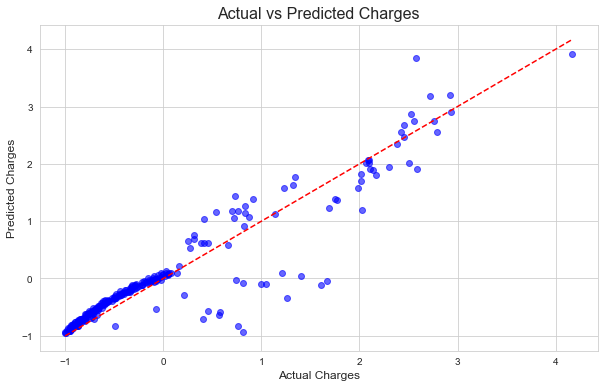

In [98]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted Charges
plt.figure(figsize=(10,6))

# Scatter plot of actual vs predicted charges
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)

# Add a line for perfect predictions (45-degree line)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

# Labels and title
plt.title('Actual vs Predicted Charges', fontsize=16)
plt.xlabel('Actual Charges', fontsize=12)
plt.ylabel('Predicted Charges', fontsize=12)

plt.show()


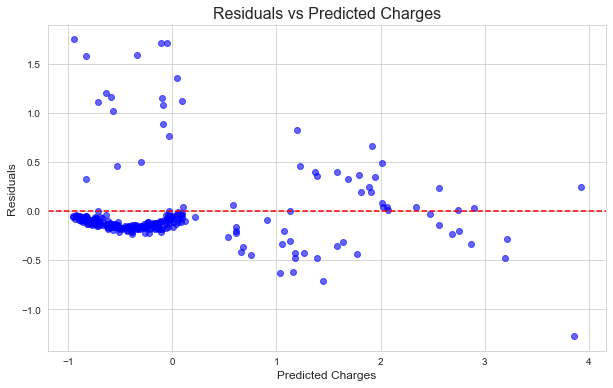

In [99]:
# Residuals (difference between actual and predicted values)
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10,6))

# Scatter plot of residuals
plt.scatter(y_pred, residuals, color='blue', alpha=0.6)

# Add a horizontal line at 0
plt.axhline(y=0, color='red', linestyle='--')

# Labels and title
plt.title('Residuals vs Predicted Charges', fontsize=16)
plt.xlabel('Predicted Charges', fontsize=12)
plt.ylabel('Residuals', fontsize=12)

plt.show()
